In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
path_to_train = '/content/drive/My Drive/AMATH 582/HW2/MNIST_training_set.npy'
path_to_test = '/content/drive/My Drive/AMATH 582/HW2/MNIST_test_set.npy'

d_train = np.load(path_to_train, allow_pickle=True)
d_test = np.load(path_to_test, allow_pickle=True)

In [17]:
X_train = d_train.item().get('features')
Y_train = d_train.item().get('labels')

print(X_train.shape)
print(Y_train.shape)

X_test = d_test.item().get('features')
Y_test = d_test.item().get('labels')

print(X_test.shape)
print(Y_test.shape)

(2000, 256)
(2000,)
(500, 256)
(500,)


labels = [1. 1. 1. 6. 0. 4. 9. 9. 3. 7. 1. 8. 3. 8. 7. 4. 3. 4. 0. 2. 5. 6. 2. 6.
 0. 0. 9. 0. 8. 1. 2. 7. 9. 7. 4. 5. 2. 4. 9. 3. 3. 1. 8. 8. 6. 4. 6. 3.
 0. 3. 1. 1. 7. 8. 9. 4. 0. 7. 7. 0. 0. 7. 2. 6.]


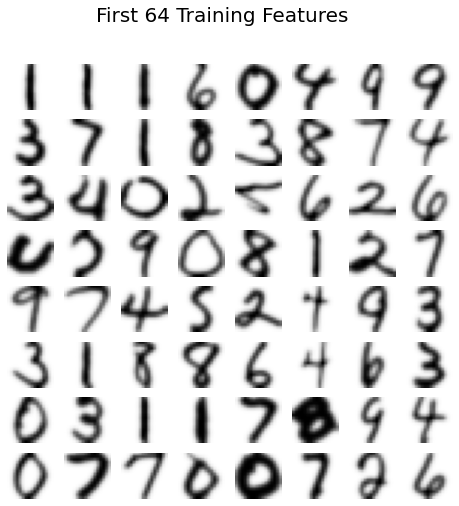

In [18]:
# Plot some of the training and test sets 

def plot_digits(XX, N, title):
    """Small helper function to plot N**2 digits."""
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j,:].reshape((16, 16)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=20)

plot_digits(X_train, 8, "First 64 Training Features" )

print('labels = '+str(Y_train[0:8**2]))

In [19]:
# PCA Modes 
X_train_transpose = np.transpose(X_train)
centered_Xt_train_data = X_train_transpose - np.mean(X_train_transpose, axis=1)[:, None] 
dU_xt, ds_xt, dVt_xt = np.linalg.svd(centered_Xt_train_data)
print(dU_xt.shape, ds_xt.shape, dVt_xt.shape)


(256, 256) (256,) (2000, 2000)


In [20]:
num_of_com = 12
ds_approx = np.copy(ds_xt)
ds_approx[num_of_com:None] =0
X_train_reconstruct = np.dot(dU_xt,np.dot(np.diag(ds_xt),dVt_xt[:256,:]))
print(X_train_reconstruct.shape)

(256, 2000)


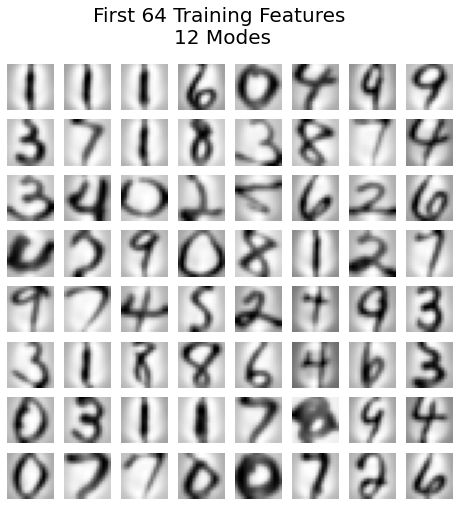

In [21]:
plot_digits(X_train_reconstruct.T, 8, "First 64 Training Features \n"+ str(num_of_com) + " Modes" )

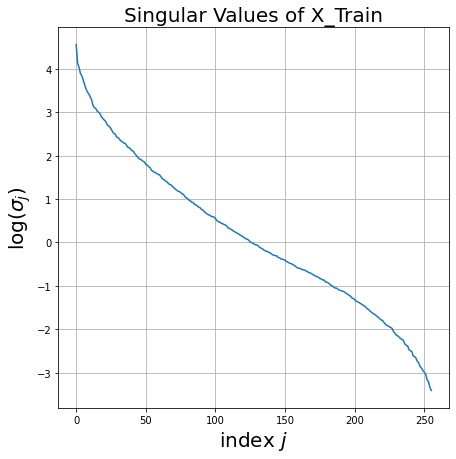

In [22]:
plt.figure(figsize=(7,7))
plt.plot(np.log(ds_xt))
plt.xlabel('index $j$',fontsize = 20)
plt.ylabel('$\log(\sigma_j)$',fontsize = 20)
plt.title('Singular Values of X_Train',fontsize = 20)
plt.grid()

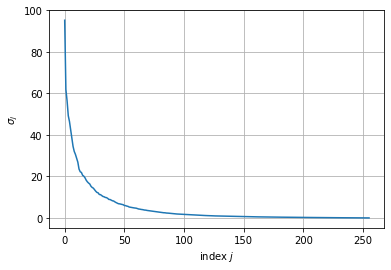

In [23]:
plt.plot(ds_xt)

plt.xlabel('index $j$')
plt.ylabel('$\sigma_j$')
plt.grid()

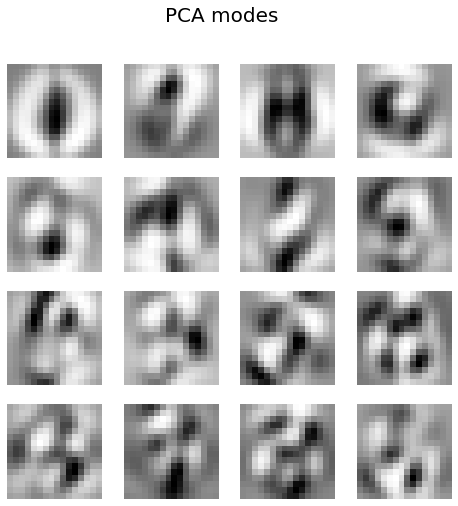

In [24]:
plot_digits(dU_xt[:,:16].T, 4, "PCA modes")

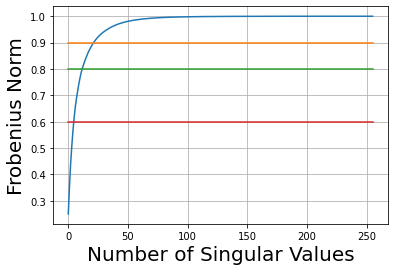

In [25]:
sum =np.cumsum(ds_xt**2)/np.sum(ds_xt**2)
plt.plot(sum)
plt.plot(np.ones(len(ds_xt))*0.9)
plt.plot(np.ones(len(ds_xt))*0.8)
plt.plot(np.ones(len(ds_xt))*0.6)
plt.ylabel('Frobenius Norm',fontsize=20)
plt.xlabel('Number of Singular Values',fontsize=20)
plt.grid()

Fraction of the Frobenius Norm 

In [26]:
frob_norm_tot = np.sum(ds_xt**2)
frob_norm_tot1 = np.sum(ds_xt[:22]**2)
frob_norm_tot4 = np.sum(ds_xt[:16]**2)
frob_norm_tot2 =  np.sum(ds_xt[:12]**2)
frob_norm_tot3 =  np.sum(ds_xt[:6]**2)
print(frob_norm_tot)
print(frob_norm_tot1/frob_norm_tot)
print(frob_norm_tot2/frob_norm_tot)
print(frob_norm_tot3/frob_norm_tot)
print(frob_norm_tot4/frob_norm_tot)

36206.07359302114
0.8987843938234922
0.7903956018992159
0.6206157940259773
0.844435661234362


PCA using SKlearn

In [27]:
#pip install sklearn


In [28]:
import sklearn

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
component_pca = pca.components_ # modes
sigma = pca.singular_values_ # sigma
print(np.sum(component_pca))
print(component_pca.shape)
print(sigma.shape)

29.872080965748122
(256, 256)
(256,)


Text(0, 0.5, '$\\log(\\sigma_j)$')

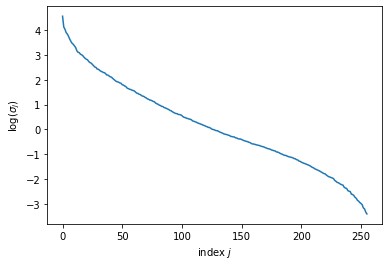

In [30]:
plt.plot(np.log(sigma))

plt.xlabel('index $j$')
plt.ylabel('$\log(\sigma_j)$')

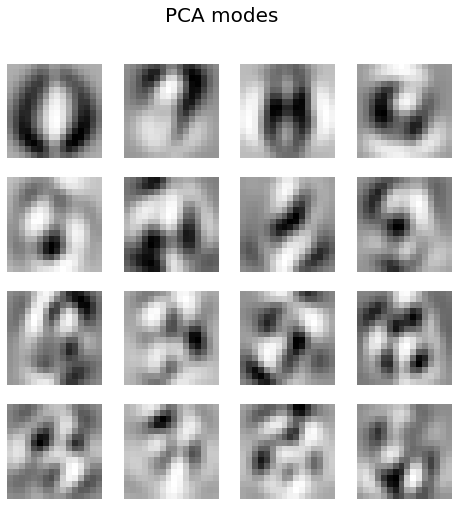

In [31]:
plot_digits(component_pca, 4, "PCA modes")

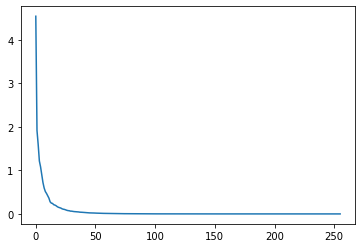

In [32]:
plt.plot(pca.explained_variance_)

Train 1 and 8 digits

In [33]:
from sklearn import linear_model

def location_finder(label_matrix,digits):
  location = np.array(np.where(label_matrix== digits))
  return location 

location1 = location_finder(Y_train,1)
print(location1.shape)
location8 = np.array(np.where(Y_train == 8))
print(location8.shape)
#.ravel()
location18 = np.hstack((location1,location8))
print(location18.shape)
#location18_2 =  location_finder(Y_train,[1 8])
label8 = -1*np.ones((1,len(location8.T)),dtype=int)
#print(label8)
label1 = 1*np.ones((1,len(location1.T)),dtype=int)
#print(label1)
label18 = np.hstack((label1,label8))
print(label18.shape)

(1, 278)
(1, 177)
(1, 455)
(1, 455)


Projection

In [34]:
centered_Xt_train_data_18 = centered_Xt_train_data[:,location18[0,:]]
print(centered_Xt_train_data_18.shape)
print(centered_Xt_train_data.shape)
#dVt_location = dVt_xt[location1[0,:],:]
#print(dVt_location.shape)

A_train18 = np.matmul(centered_Xt_train_data_18.T,dU_xt[:,:16])
print(A_train18.shape)
reg_Atr18 = linear_model.RidgeCV(alphas=1)
reg_Atr18.fit(A_train18,label18.T)
betahat_18 = reg_Atr18.coef_
predicted_18 = np.matmul(A_train18,betahat_18.T)
MSE_18= 1/len(label18.T)*np.linalg.norm(predicted_18-label18.T,2)**2
print('MSE_18_train = '+ str(MSE_18*100) +'%')
print(MSE_18)
#MSE_train18 = (1/length(label18.T))*(np.matmul)

(256, 455)
(256, 2000)
(455, 16)
MSE_18_train = 26.573208992202513%
0.2657320899220251


Text(0.5, 1.0, 'Digit 1 Train Data')

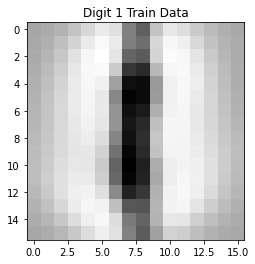

In [35]:
plt.imshow(centered_Xt_train_data_18[:,0].reshape(16,16),cmap='Greys')
plt.title('Digit 1 Train Data')

Text(0.5, 1.0, 'Digit 8 Train Data')

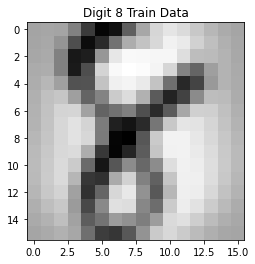

In [36]:
plt.imshow(centered_Xt_train_data_18[:,-1].reshape(16,16),cmap='Greys')
plt.title('Digit 8 Train Data')

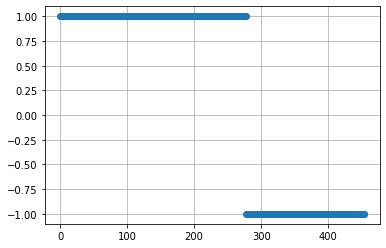

In [37]:
plt.plot(label18.T,'o')
plt.grid()

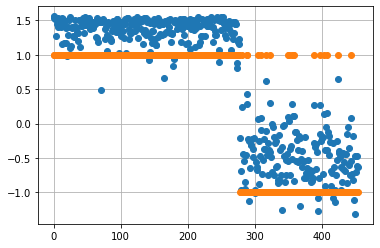

In [66]:
plt.plot(predicted_18,'o')
plt.plot(np.sign(predicted_18),'o')
#plt.plot(np.ones(len(predicted_18)))
#plt.plot(-1*np.ones(len(predicted_18)))
#plt.plot(label18.T,'x')
plt.grid()

Test for 1 and 8 Digits

In [39]:
X_test_transpose = np.transpose(X_test)
centered_Xt_test_data = X_test_transpose - np.mean(X_test_transpose, axis=1)[:, None] 

In [40]:
# Test data
location1test = location_finder(Y_test,1)
print(location1test.shape)
location8test = location_finder(Y_test,8)
print(location8test.shape)
location18test = np.hstack((location1test,location8test))
label8test = -1*np.ones((1,len(location8test.T)),dtype=int)
#print(label8)
label1test = 1*np.ones((1,len(location1test.T)),dtype=int)
#print(label1)
label18_test = np.hstack((label1test,label8test))
print(label18_test.shape)

(1, 72)
(1, 24)
(1, 96)


In [41]:
centered_Xt_test_data_18 = centered_Xt_test_data[:,location18test[0,:]]
print(centered_Xt_test_data_18.shape)
A_test18 = np.matmul(centered_Xt_test_data_18.T,dU_xt[:,:16])
print(A_test18.shape)

betahat_18test = reg_Atr18.predict(A_test18)
print(betahat_18test.shape)
#predicted_18test = np.matmul(A_test18,betahat_18test.T)
MSE_18test = 1/len(label18_test.T)*np.linalg.norm(betahat_18test-label18_test.T,2)**2
print('MSE_18_Test = '+ str(MSE_18test*100)+ '%')

(256, 96)
(96, 16)
(96, 1)
MSE_18_Test = 8.544809888512116%


Text(0.5, 1.0, 'Digit 1 Test Data')

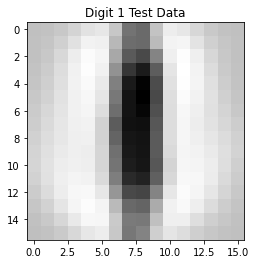

In [42]:
plt.imshow(centered_Xt_test_data_18[:,0].reshape(16,16),cmap='Greys')
plt.title('Digit 1 Test Data')

Text(0.5, 1.0, 'Digit 8 Test Data')

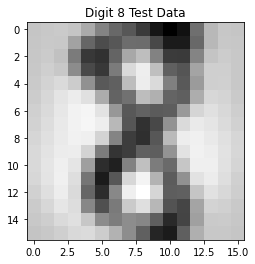

In [43]:
plt.imshow(centered_Xt_test_data_18[:,-1].reshape(16,16),cmap='Greys')
plt.title('Digit 8 Test Data')

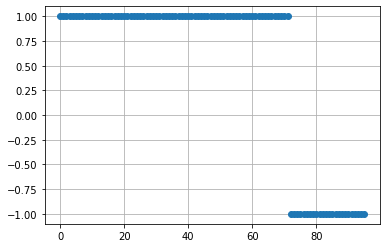

In [44]:
plt.plot(label18_test.T,'o')
plt.grid()

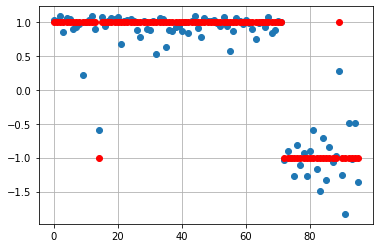

In [45]:
plt.plot(betahat_18test,'o')
plt.plot(np.sign(betahat_18test),'ro')
#plt.plot(np.ones(len(predicted_27)))
#plt.plot(-1*np.ones(len(predicted_27)))
plt.grid()

Function for location and label finder for Y train and test

In [46]:
def location_finder_updated(label_matrix,digits):
  location = np.empty_like([[]],dtype=int)
  if len(digits)>1:
    for digit in digits:
      location1 = np.array(np.where(label_matrix== digit))
      #location = np.hstack((location,location1))
      location = np.append(location,location1)
  else:
    location = np.array(np.where(label_matrix == digits))
  return location #ndarray shape be careful!

def label_giver(label_matrix,digits):
  label = [[]]
  if len(digits)>1:
    for i in range(len(digits)):
      if digits[i] > 5:
        labelmult = -1
      else:
        labelmult = 1
      length = len(location_finder_updated(label_matrix,[digits[i]]).T)
      labeldig = labelmult*np.ones((1,length ))
      label =  np.hstack((label,labeldig))
  else:
    if digits[0] > 5:
        labelmult = -1
    else:
        labelmult = 1
    length = len(location_finder_updated(label_matrix,digits).T)
    label  = labelmult*np.ones((1,length ))
  return label



DIGIT 2 & 7 Training

In [47]:
# label and locations for digits 2 and 7
location27_train = location_finder_updated(Y_train,[2,7])
label27_train = label_giver(Y_train,[2,7])
print(label27_train.shape)
#Creating A_train for digits 2 and 7
centered_Xt_train_data_27 = centered_Xt_train_data[:,location27_train[:]]
print(centered_Xt_train_data_27.shape)
A_train27 = np.matmul(centered_Xt_train_data_27.T,dU_xt[:,:16])
print(A_train27.shape)
reg_Atr27 = linear_model.RidgeCV(alphas=1)
reg_Atr27.fit(A_train27,label27_train.T)
beta_hat_27 = reg_Atr27.coef_
predicted_27 = np.matmul(A_train27,beta_hat_27.T)
MSE_27train = 1/len(label27_train.T)*np.linalg.norm(predicted_27-label27_train.T,2)**2
print(MSE_27train)



(1, 351)
(256, 351)
(351, 16)
0.12799806149580215


Text(0.5, 1.0, 'Digit 2 Train Data')

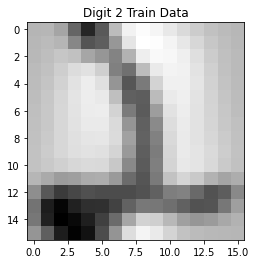

In [48]:
plt.imshow(centered_Xt_train_data_27[:,0].reshape(16,16),cmap='Greys')
plt.title('Digit 2 Train Data')

Text(0.5, 1.0, 'Digit 7 Train Data')

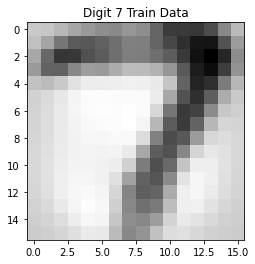

In [49]:
plt.imshow(centered_Xt_train_data_27[:,-1].reshape(16,16),cmap='Greys')
plt.title('Digit 7 Train Data')

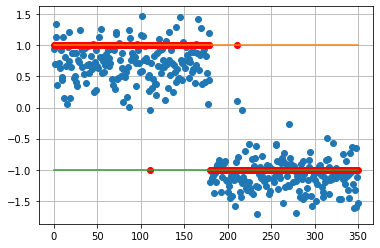

In [50]:
plt.plot(predicted_27,'o')
plt.plot(np.sign(predicted_27),'ro')
plt.plot(np.ones(len(predicted_27)))
plt.plot(-1*np.ones(len(predicted_27)))
plt.grid()

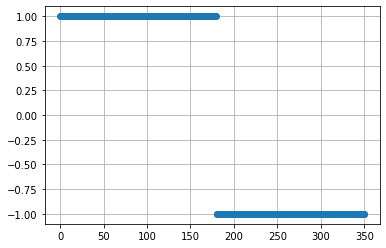

In [51]:
plt.plot(label27_train.T,'o')
plt.grid()

Digit 2 & 7 Test

In [52]:
location27_test = location_finder_updated(Y_test,[2,7])
label27_test = label_giver(Y_test,[2,7])
print(label27_test.shape)
centered_Xt_test_data_27 = centered_Xt_test_data[:,location27_test[:]]
print(centered_Xt_test_data_27.shape)
A_test27 = np.matmul(centered_Xt_test_data_27.T,dU_xt[:,:16])
print(A_test27.shape)
betahat_27test = reg_Atr27.predict(A_test27)
print(betahat_27test.shape)
MSE_27test = 1/len(label27_test.T)*np.linalg.norm(betahat_27test-label27_test.T,2)**2
print('MSE_27_Test = '+ str(MSE_27test*100)+ '%')

(1, 98)
(256, 98)
(98, 16)
(98, 1)
MSE_27_Test = 13.655078696751719%


Text(0.5, 1.0, 'Digit 2 Test Data')

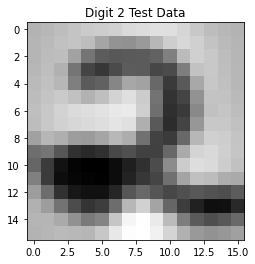

In [53]:
plt.imshow(centered_Xt_test_data_27[:,0].reshape(16,16),cmap='Greys')
plt.title('Digit 2 Test Data')

Text(0.5, 1.0, 'Digit 7 Test Data')

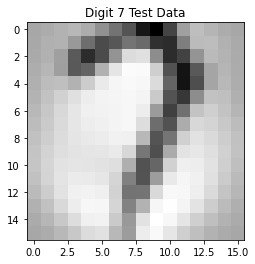

In [54]:
plt.imshow(centered_Xt_test_data_27[:,-1].reshape(16,16),cmap='Greys')
plt.title('Digit 7 Test Data')

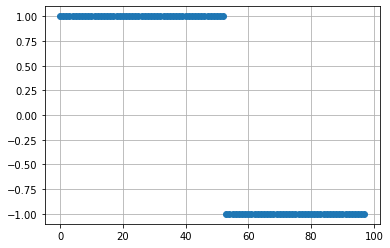

In [55]:
plt.plot(label27_test.T,'o')
plt.grid()

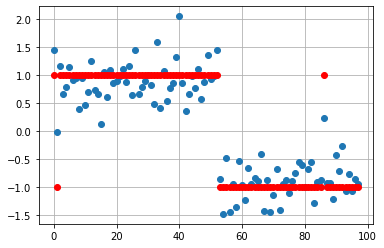

In [56]:
plt.plot(betahat_27test,'o')
plt.plot(np.sign(betahat_27test),'ro')
#plt.plot(np.ones(len(predicted_27)))
#plt.plot(-1*np.ones(len(predicted_27)))
plt.grid()

Digit 3 & 8 Training 

In [57]:
# label and locations for digits 2 and 7
location38_train = location_finder_updated(Y_train,[3,8])
label38_train = label_giver(Y_train,[3,8])
print(label38_train.shape)
#Creating A_train for digits 2 and 7
centered_Xt_train_data_38 = centered_Xt_train_data[:,location38_train[:]]
print(centered_Xt_train_data_38.shape)
A_train38 = np.matmul(centered_Xt_train_data_38.T,dU_xt[:,:16])
print(A_train38.shape)
reg_Atr38 = linear_model.RidgeCV(alphas=1)
reg_Atr38.fit(A_train38,label38_train.T)
beta_hat_38 = reg_Atr38.coef_
predicted_38 = np.matmul(A_train38,beta_hat_38.T)
MSE_38train = 1/len(label38_train.T)*np.linalg.norm(predicted_38-label38_train.T,2)**2
print(MSE_38train)

(1, 351)
(256, 351)
(351, 16)
0.2426455027276254


Text(0.5, 1.0, 'Digit 3 Train Data')

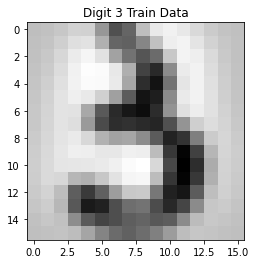

In [58]:
plt.imshow(centered_Xt_train_data_38[:,0].reshape(16,16),cmap='Greys')
plt.title('Digit 3 Train Data')

Text(0.5, 1.0, 'Digit 8')

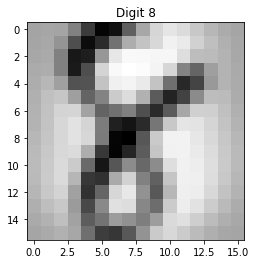

In [59]:
plt.imshow(centered_Xt_train_data_38[:,-1].reshape(16,16),cmap='Greys')
plt.title('Digit 8')

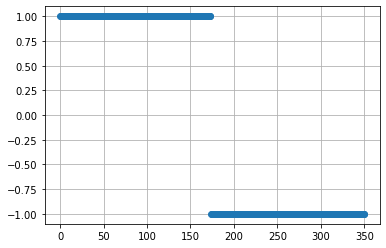

In [60]:
plt.plot(label38_train.T,'o')
plt.grid()

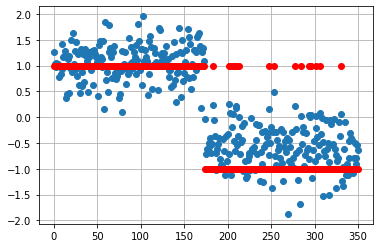

In [61]:
plt.plot(predicted_38,'o')
plt.plot(np.sign(predicted_38),'ro')
#plt.plot(np.ones(len(predicted_27)))
#plt.plot(-1*np.ones(len(predicted_27)))
plt.grid()

Digit 3 & 8 Test

In [62]:
location38_test = location_finder_updated(Y_test,[3,8])
label38_test = label_giver(Y_test,[3,8])
print(label38_test.shape)
centered_Xt_test_data_38 = centered_Xt_test_data[:,location38_test[:]]
print(centered_Xt_test_data_38.shape)
A_test38 = np.matmul(centered_Xt_test_data_38.T,dU_xt[:,:16])
print(A_test38.shape)
betahat_38test = reg_Atr38.predict(A_test38)
print(betahat_38test.shape)
MSE_38test = 1/len(label38_test.T)*np.linalg.norm(betahat_38test-label38_test.T,2)**2
print('MSE_38_Test = '+ str(MSE_38test*100)+ '%')
#print(MSE_38test)

(1, 72)
(256, 72)
(72, 16)
(72, 1)
MSE_38_Test = 26.12476373335059%


In [63]:
print('MSE_18_train = '+ str(MSE_18*100) +'%')
print('MSE_18_Test = '+ str(MSE_18test*100)+ '%')
print('MSE_27_train = '+ str(MSE_27train*100) +'%')
print('MSE_27_Test = '+ str(MSE_27test*100)+ '%')
print('MSE_38_train = '+ str(MSE_38train*100) +'%')
print('MSE_38_Test = '+ str(MSE_38test*100)+ '%')

MSE_18_train = 26.573208992202513%
MSE_18_Test = 8.544809888512116%
MSE_27_train = 12.799806149580215%
MSE_27_Test = 13.655078696751719%
MSE_38_train = 24.264550272762538%
MSE_38_Test = 26.12476373335059%


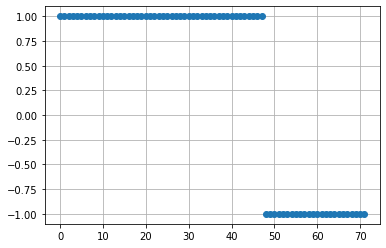

In [64]:
plt.plot(label38_test.T,'o')
plt.grid()

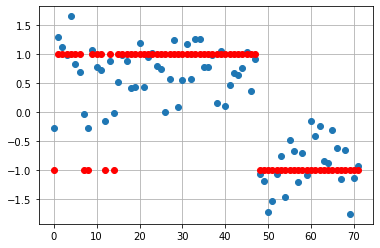

In [65]:
plt.plot(betahat_38test,'o')
plt.plot(np.sign(betahat_38test),'ro')
#plt.plot(np.ones(len(predicted_27)))
#plt.plot(-1*np.ones(len(predicted_27)))
plt.grid()